In [1]:
"""
지니계수 - 데이터 분포 균형 제대로 안 된거 판별 
ex) 가슴통증 있거나 없거나, 심장병 있는사람 없는사람
가슴통증 있고 심장병 있는사람 105, 없는사람 39
가슴틍증 없고 심장병있음 34 없음 125이면, 
1-(105/(105+39))^2-(39/(105+39))^2 가 곧 심장병있고 가슴통증없는 사람의 지니계수
지니가 낮을수록 분포균형이 잘 된 것

토탈 섬 가슴통증 있는 것의 지니게수는 0.395, 없는 건 0.336가 나오는데,
여기서 있는사람 총수 144와 없는사람 159이므로
(144*0.395)/(144+159) + (159*0.336)/(144+159)가 최종 0.364, 가슴통증의 총 지니계수가 됨

chest pain 잇는 사람중 심장병 있거나, 없거나등등을 세서, data를 생성
이를 통해, 어떤 feature가 더 좋은지 판별한다.
chest pain || good blood circulation || blocked arteries 등등과 심장병의 지니계수를 계산해,
낮을수록 더 순도가 높다는 것이며, 만일 good blood circulation과 심장병의 지니계수가 낮다면
심장혈관과 심장병의 상관관계가 제일 높단 것의 추측이 가능
이 가장 낮은 것을 맨위 Tree에 놓는다. 다음으론,

Good blood circulation을 제한 것과 심장병 지니관계중 제일 낮은걸 다음 node로 놓기

주의점! Tree를 무한정 길게 하지 마라. 어떤 노드의 새끼 노드의 지니계수가 더 높다면, 
부모보다 순도가 더 낮다는 것. 
하나의 노드로 나눠진 정보가 새끼보다 더 나아야 하는데, 새끼에서 나눴을 때 지니계수가 더 높다면
더 하는 의미가 없어진다.
부모는, 자식보다 그 가치가 좋아야 하는데, 새끼의 지니계수가 높다면 정보 가치가 떨어진다.

https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

"""

from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
iris = load_iris()

In [3]:
X, y= iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [4]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [8]:
iris.feature_names
"""
꽃잎 길이와 너비, 꽃받침대 길이 너비에 관한 행
"""



'\n꽃잎 길이와 너비, 꽃받침대 길이 너비에 관한 행\n'

In [10]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
"""
전체적으로 3개의 클래스 존재(꽃들의 종류) 0으로 나오면 setosa, 1번이면 versicolor,
2번이aus virginica
어떤 data가 input으로 들어올때 어떤 클래스에 해당하는 꽃인지 decision tree로 구해보자!
fully connected layer로도 가능할 테지만, 이 편도 가능.
"""
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
model = tree.DecisionTreeClassifier()

In [18]:
model = model.fit(X,y) #인풋, 아웃풋 넣고 fit

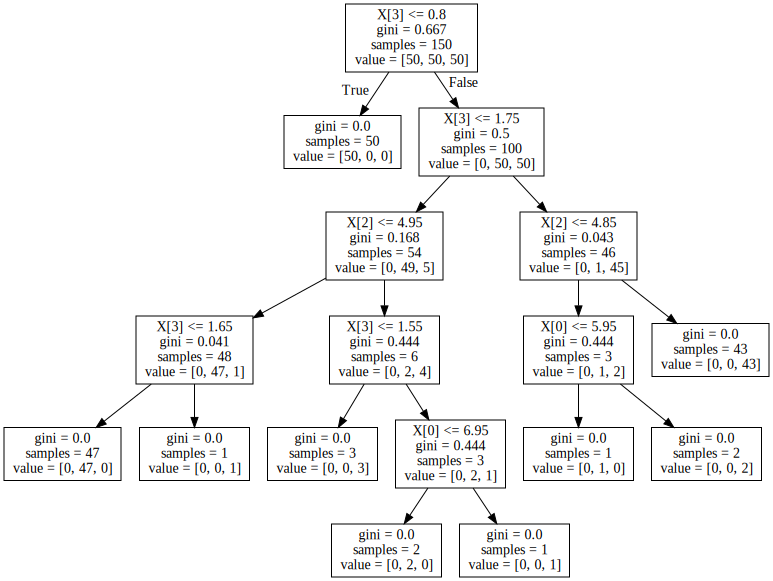

In [22]:
import graphviz

#
dot_data = tree.export_graphviz(model, out_file = None)
graph = graphviz.Source(dot_data)

graph #트리 완성시키기

"""
지니계수는, 아래에서는 그냥 1에서 뺀 것이 아닌, 높은 게 더 좋다고 표시함
X[2]인 꽃잎 너비가 0.8보다 작느냐를 기준으로 트리를 구성  
"""

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
"""
만일 아래의 새 데이터가 들어왔다 할 때, 이 꽃이 어떤 품종인지 밝히고자 한다.
예측을 돌려본다. predict통해, decision tree에다가 X[50]을 넣어본다.
"""
X[50]

array([7. , 3.2, 4.7, 1.4])

In [26]:
"""
50번쨰 꽃은 첫 번째 클래스(종류의 꽃), 100번쨰 꽃은 두 번째 클래스(꽃)이다.
"""
model.predict([X[0], X[50], X[100]])

array([0, 1, 2])